# <font color = blue>WOMEN IN TECH </font><br>

The title of this notebook is "Women in Tech". The study focuses on girls that attend Computer Science subjects at school, and that would develop in a profession related to programming, data analysis, computing, etc.<br>

In the last years, it has been identified a big gender gap in professions related to computer science. It is believed, that one of the steps in reducing this gap is to motivate girls when they are still at school.<br>

Unfortunately for us, the necessary data on which schools offer computer science subjects (CS) has not been provided by the Government. The available datasets offer demographic information on pupils by type of public school or by certifications/achievements without mentioning the schools. Further comments are in the report.<br> 


Due to lack of data, this notebook will show graphs and maps of the pupil population in Scotland. The dataset used can be found in the Scottish Government page https://www.gov.scot/collections/school-education-statistics/. There are similar datasets for 2010 to 2019 in the same website.<br>

For this notebook, I have used information from the dataset _School Level Summary Statistics_ of 2020. It contains data of public schools, primary, secondary and special. It does not contain independent and/or private schools, colleges or universities.<br>

This study will include:<br>

- issues resolved when cleaning the dataset.<br>
- short discussions about data quality issues encountered during the cleaning process and possible bias.<br>
- some basic statistics about public schools, obtained from the 2020 dataset.<br>
- some graphs / maps showing pupil population by postcode and by local authority.<br>


The contents of the database are discussed in the report. This dataset is composed of two sheets:<br>

- Sheet 1 with information about the data.<br>
- Sheet 2 with the data we need.<br>

The pandas _read_ function uses the first sheet, so I had to move the contents in Sheet 1 to a different Sheet and make Sheet 2 as Sheet 1.<br>

### <span style="color:blue">**READING THE DATASET AND NECESSARY LIBRARIES**</span>

In [332]:
import pandas as pd
import janitor
import geopandas as gpd
import numpy as np
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os.path as path

schools = pd.read_excel("https://github.com/EsterGM/Women-In-Tech/tree/main/Demographics/0--School+level+summary+statistics+2020+compiled - values.xlsx")

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Address Details,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Contact Details,Unnamed: 9,Unnamed: 10,School Type,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Roll by sex,Unnamed: 24,Primary pupils by stage,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Secondary pupils by stage,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Free school meals (FSM) information(7),Unnamed: 44,Unnamed: 45,Roll by SIMD 2020 Quintiles,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Pupils by urban/rural classification of their home address( 4),Unnamed: 53,Unnamed: 54,Unnamed: 55,2018/19 Attendance and absence rates(5),Unnamed: 57,Unnamed: 58,Unnamed: 59,Other school information,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,SeedCode,Local Authority,School Name,Address Line1,Address Line2,Address Line3,Post Code,Unique Property Reference Number (UPRN),Email,Phone Number,Website Address,Pre-school Department,Primary Department,Secondary Department,Special Department,Gaelic Unit,Integrated Special Unit,Denomination,School Type,FTE Teachers,Pupil roll(1),Pupil Teacher Ratio,Average class size,Female,Male,P1,P2,P3,P4,P5,P6,P7,S1,S2,S3,S4,S5,S6,Special school pupils,Pupils with an Additional Support Need recorded,Pupils from minority ethnic groups(2),Pupils with English as an Additional Language,Pupils taught in Gaelic(3),Number of P4-P7/S1-S6/SP pupils registered for...,Percentage of P4-P7/S1-S6/SP pupils registered...,Local initiatives to extend FSM eligibility,SIMD Quintile 1,SIMD Quintile 2,SIMD Quintile 3,SIMD Quintile 4,SIMD Quintile 5,SIMD not availble,Urban,Small town,Rural,Urban/rural classification not available,Attendance rate,Authorised absence rate,Unuathorised absence rate,Temporary exclusion rate,School's 6-fold urban/rural classification(4),School's 8-fold urban/rural classification(4),Denomination of school,Comparison Denominations
1,8212627,North Ayrshire,Abbey Primary School,Claremont Crescent,KILWINNING,KILWINNING,KA13 7HG,126060678,abbey@ea.n-ayrshire.sch.uk,01294 552251,https://blogs.glowscotland.org.uk/na/abbeyprim...,Yes,Yes,No,No,No,No,Non-denominational,Primary,18.2,282,15.5,23.5,136,146,42,33,31,39,47,46,44,#,#,#,#,#,#,#,82,*,*,0,42,23.9,NaN,162,30,53,20,17,0,90-100%,0-10%,0-10%,0-10%,93.16,4.91,*,*,Other urban areas,Other urban areas,Non-denominational,True
2,5520924,City of Edinburgh,Abbeyhill Primary School,Abbey Street,Edinburgh,Edinburgh,EH7 5SJ,906353988,admin@abbeyhill.edin.sch.uk,0131 661 3054,http://www.abbeyhill.edin.sch.uk/,Yes,Yes,No,No,No,No,Non-denominational,Primary,9.9,160,16.1,22.9,85,75,24,23,25,26,22,16,24,#,#,#,#,#,#,#,51,*,30,0,18,20.5,NaN,11,44,60,24,21,0,90-100%,0-10%,0-10%,0-10%,93.49,4.04,*,*,Large urban areas,Large urban areas,Non-denominational,True
3,5237521,Aberdeen City,Abbotswell School,Faulds Gate,Kincorth,ABERDEEN,AB12 5QX,9051057476,abbotswell@aberdeencity.gov.uk,01224 872714,http://www.abbotswell.aberdeen.sch.uk/,Yes,Yes,No,No,No,No,Non-denominational,Primary,14.9,228,15.3,22.8,104,124,29,38,33,33,31,30,34,#,#,#,#,#,#,#,88,22,41,0,23,18,NaN,45,50,109,24,0,0,90-100%,0-10%,0-10%,0-10%,93.2,5.76,*,*,Large urban areas,Large urban areas,Non-denominational,True


The head of the dataset shows a title row with "unnamed items". Row 0 seems to have the "normal titles".<br>

Taking a look at the excel dataset, there are 2 rows of titles, one of merged title cells and another with a title in every column and no merged cells.<br>

This can be confusing and can generate conflicts in calculations, so I decided to skip the row of merged titles. The _read_ function will begin on the second row of the excel dataset, which contains normal single column titles.<br>

In [416]:
schools = pd.read_excel("https://github.com/EsterGM/Women-In-Tech/tree/main/Women-In-STEM-Scottish-Universities/0--School+level+summary+statistics+2020-compiled - values.xlsx", skiprows=1)
schools.head(5)

,SeedCode,Local Authority,School Name,Address Line1,Address Line2,Address Line3,Post Code,Unique Property Reference Number (UPRN),Email,Phone Number,Website Address,Pre-school Department,Primary Department,Secondary Department,Special Department,Gaelic Unit,Integrated Special Unit,Denomination,School Type,FTE Teachers,Pupil roll(1),Pupil Teacher Ratio,Average class size,Female,Male,P1,P2,P3,P4,P5,P6,P7,S1,S2,S3,S4,S5,S6,Special school pupils,Pupils with an Additional Support Need recorded,Pupils from minority ethnic groups(2),Pupils with English as an Additional Language,Pupils taught in Gaelic(3),Number of P4-P7/S1-S6/SP pupils registered for FSM,Percentage of P4-P7/S1-S6/SP pupils registered for FSM,Local initiatives to extend FSM eligibility,SIMD Quintile 1,SIMD Quintile 2,SIMD Quintile 3,SIMD Quintile 4,SIMD Quintile 5,SIMD not availble,Urban,Small town,Rural,Urban/rural classification not available,Attendance rate,Authorised absence rate,Unuathorised absence rate,Temporary exclusion rate,School's 6-fold urban/rural classification(4),School's 8-fold urban/rural classification(4),Denomination of school,Comparison Denominations
0,8212627,North Ayrshire,Abbey Primary School,Claremont Crescent,KILWINNING,KILWINNING,KA13 7HG,126060678,abbey@ea.n-ayrshire.sch.uk,01294 552251,https://blogs.glowscotland.org.uk/na/abbeyprim...,Yes,Yes,No,No,No,No,Non-denominational,Primary,18.2,282,15.5,23.5,136,146,42,33,31,39,47,46,44,#,#,#,#,#,#,#,82,*,*,0,42,23.9,NaN,162,30,53,20,17,0,90-100%,0-10%,0-10%,0-10%,93.16,4.91,*,*,Other urban areas,Other urban areas,Non-denominational,True
1,5520924,City of Edinburgh,Abbeyhill Primary School,Abbey Street,Edinburgh,Edinburgh,EH7 5SJ,906353988,admin@abbeyhill.edin.sch.uk,0131 661 3054,http://www.abbeyhill.edin.sch.uk/,Yes,Yes,No,No,No,No,Non-denominational,Primary,9.9,160,16.1,22.9,85,75,24,23,25,26,22,16,24,#,#,#,#,#,#,#,51,*,30,0,18,20.5,NaN,11,44,60,24,21,0,90-100%,0-10%,0-10%,0-10%,93.49,4.04,*,*,Large urban areas,Large urban areas,Non-denominational,True
2,5237521,Aberdeen City,Abbotswell School,Faulds Gate,Kincorth,ABERDEEN,AB12 5QX,9051057476,abbotswell@aberdeencity.gov.uk,01224 872714,http://www.abbotswell.aberdeen.sch.uk/,Yes,Yes,No,No,No,No,Non-denominational,Primary,14.9,228,15.3,22.8,104,124,29,38,33,33,31,30,34,#,#,#,#,#,#,#,88,22,41,0,23,18,NaN,45,50,109,24,0,0,90-100%,0-10%,0-10%,0-10%,93.2,5.76,*,*,Large urban areas,Large urban areas,Non-denominational,True
3,5212227,Aberdeenshire,Aberchirder Primary School,Smith Crescent,Aberchirder Huntly,ABERDEENSHIRE,AB54 7TW,151086442,aberchirder.sch@aberdeenshire.gov.uk,01466 405920,http://www.aberchirder.aberdeenshire.sch.uk/,Yes,Yes,No,No,No,No,Non-denominational,Primary,8.5,128,15.1,21.3,62,66,22,20,15,12,20,13,26,#,#,#,#,#,#,#,69,*,11,0,9,12.7,NaN,0,52,69,7,0,0,0-10%,0-10%,90-100%,0-10%,93.99,4.44,*,*,Remote rural areas,Remote rural areas,Non-denominational,True
4,8448647,Glasgow City,Abercorn Secondary School,195 Garscube Road,GLASGOW,GLASGOW,G4 9QH,906700048474,headteacher@abercorn-sec.glasgow.sch.uk,0141 332 6212,http://www.abercorn-sec.glasgow.sch.uk/,No,No,No,Yes,No,No,Non-denominational,Special,26.0,138,5.3,#,45,93,#,#,#,#,#,#,#,#,#,#,#,#,#,138,138,19,19,0,138,100,All pupils in Glasgow City special schools are...,84,33,5,5,11,0,90-100%,0-10%,0-10%,0-10%,90.09,5.89,*,*,Large urban areas,Large urban areas,Non-denominational,True


### <span style="color:blue">**DESCRIPTION OF THE DATASET**</span><br>

Just for general information purposes, how this dataset is distributed, datatypes (integers, booleans, objects), etc.<br>

In [417]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476 entries, 0 to 2475
Data columns (total 64 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   SeedCode                                                2476 non-null   int64  
 1   Local Authority                                         2476 non-null   object 
 2   School Name                                             2476 non-null   object 
 3   Address Line1                                           2472 non-null   object 
 4   Address Line2                                           2476 non-null   object 
 5   Address Line3                                           2476 non-null   object 
 6   Post Code                                               2476 non-null   object 
 7   Unique Property Reference Number (UPRN)                 2476 non-null   object 
 8   Email                                 

This dataset contains 64 columns and 2476 rows. This means that we had 2476 schools in Scotland in 2020. Later on, this number will need to be corrected, but as for now, this is the initial data we have.<br> 

The _info_ function shows a high number of columns with numbers that have a format _object_. This format is not correct for making calculations and needs to be changed to number. The reason is that the dataset contains a high amount of cells with the characters " * " and "#". These two symbols can mean that the school did not want to disclose information or had no pupils.<br>

This can also be related to a lack of quality in the dataset:<br>

- when entering data in the school register of the Government, schools can enter a cero if there are no pupils.<br>

- entering a * or a # is misleading and does not mean that there are no students, but that the school does not want to inform on them. This can provoke a bias issue, as the final calculations would not be correct. The reasons of no disclosure would need to be investigated.<br>

### <span style="color:blue">**DATATYPES**</span><br>

If the dataset is small enough, it is worth modifying the excel spreadsheet from "General" format to "Number" and read the file again. It worked partially in this case: FTE Teachers and Pupil Roll columns show their correct type.<br>
We need to perform other corrections.<br>

Firstly, substitution of " * " and "#" by ceros (the _to_numeric_ function cannot read these characters and returns an error):<br>

- perform the substituion from column 21 to 37.<br>
- columns of SIMD data: changed just in case I use them later.<br>

Secondly, to change the format of the columns mentioned before into numbers using the function *to_numeric*, instead of teh current *object* type. Numbers are better for visualizations and graphs.<br>

In [418]:
schools[['Pupil Teacher Ratio', 'Average class size','Female','Male','P1','P2','P3','P4','P5','P6','P7','S1','S2','S3','S4','S5','S6','SIMD Quintile 1','SIMD Quintile 2','SIMD Quintile 3','SIMD Quintile 4','SIMD Quintile 5','SIMD not availble']] = schools[['Pupil Teacher Ratio', 'Average class size','Female','Male','P1','P2','P3','P4','P5','P6','P7','S1','S2','S3','S4','S5','S6','SIMD Quintile 1','SIMD Quintile 2','SIMD Quintile 3','SIMD Quintile 4','SIMD Quintile 5','SIMD not availble']].replace(["*","#"], [0, 0])

In [419]:
schools[['Pupil Teacher Ratio', 'Average class size','Female','Male','P1','P2','P3','P4','P5','P6','P7','S1','S2','S3','S4','S5','S6','SIMD Quintile 1','SIMD Quintile 2','SIMD Quintile 3','SIMD Quintile 4','SIMD Quintile 5','SIMD not availble']] = schools[['Pupil Teacher Ratio', 'Average class size','Female','Male','P1','P2','P3','P4','P5','P6','P7','S1','S2','S3','S4','S5','S6','SIMD Quintile 1','SIMD Quintile 2','SIMD Quintile 3','SIMD Quintile 4','SIMD Quintile 5','SIMD not availble']].apply(pd.to_numeric)
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476 entries, 0 to 2475
Data columns (total 64 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   SeedCode                                                2476 non-null   int64  
 1   Local Authority                                         2476 non-null   object 
 2   School Name                                             2476 non-null   object 
 3   Address Line1                                           2472 non-null   object 
 4   Address Line2                                           2476 non-null   object 
 5   Address Line3                                           2476 non-null   object 
 6   Post Code                                               2476 non-null   object 
 7   Unique Property Reference Number (UPRN)                 2476 non-null   object 
 8   Email                                 

As it can be seen from above, the requested columns have been changed to a numeric format.<br>

Now some description of the dataset. The function _describe()_ uses columns with numbers:<br>

In [420]:
schools.describe()

,SeedCode,FTE Teachers,Pupil roll(1),Pupil Teacher Ratio,Average class size,Female,Male,P1,P2,P3,P4,P5,P6,P7,S1,S2,S3,S4,S5,S6,SIMD Quintile 1,SIMD Quintile 2,SIMD Quintile 3,SIMD Quintile 4,SIMD Quintile 5,SIMD not availble
count,2.476000e+03,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000
mean,6.441203e+06,20.812722,283.601373,13.354847,16.993498,138.942649,144.119548,21.224152,22.035945,22.043619,22.726575,23.081179,22.985057,23.012520,23.067447,22.858643,22.189418,21.432553,18.753635,13.158724,62.007674,53.382876,47.771405,53.562197,52.446688,0.090065
std,1.706817e+06,23.018043,303.560825,4.050749,9.372482,151.842664,153.209951,21.195507,21.955233,21.703468,22.574625,22.808457,22.547498,22.733259,63.041047,62.140442,60.442517,58.553726,51.700957,37.251635,111.258078,78.862625,74.245894,85.294038,118.654146,1.593790
min,1.000047e+06,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.325924e+06,6.800000,74.000000,11.400000,12.000000,34.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.701676e+06,14.100000,201.000000,13.900000,20.700000,97.000000,101.500000,17.000000,18.000000,18.000000,19.000000,18.000000,19.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,22.000000,22.000000,19.000000,0.000000,0.000000
75%,8.337984e+06,22.200000,350.000000,16.200000,24.100000,172.000000,178.250000,35.000000,37.000000,37.000000,38.000000,39.000000,38.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,84.000000,76.000000,64.000000,73.000000,46.250000,0.000000
max,8.670242e+06,155.200000,2196.000000,24.100000,30.000000,1064.000000,1132.000000,134.000000,116.000000,136.000000,162.000000,156.000000,154.000000,155.000000,403.000000,399.000000,392.000000,373.000000,350.000000,285.000000,1293.000000,608.000000,942.000000,671.000000,1320.000000,61.000000


#### PUPILS<br> 

As mentioned before, there are 2476 rows (~ schools) in Scotland.<br> 

- The _min_ is cero: this value belongs to schools with real cero pupils or with undisclosed data.<br>

- The range of pupils go from 2 (as seen in the excel spreadsheet, without taking into account the ceros) to 2196 in the big academic centres (*max* shows 1064 females and 1132 males). <br>

- The mean of girls/boys goes towards boys. This is very curious, because in Europe, the mean is usually directed towards girls (51% women, 49% men).<br>

In other parts of this study, it is shown that there is an increase in the number of pupils taking Computer Science subjects in the last years. This general increase is explained by an increase in the number of boys taking the subjects, while the number of girls has even decreased. From the 2020 data, we can see that the general population has increased the number of boys over the number of girls, even slightly, which can also explain the increase in boys taking CS.<br> 


#### TEACHERS<br> 

The maximum number of teachers per school is 155.2. Decimals can be related to part-time/visitor teachers. <br> 

If schools do not provide information, the number of teachers appear as cero. There is an exception with 2 pupils and cero teachers at the special school "Secondary Wellbeing" in Kirkintilloch. This is a quality issue of the database, because we do not know if there are 1 or 2 teachers, or even more. For easiness of calculation, I will assume that at least there is 1 teacher and I will change the cero for a 1 in the column FTE Teacher for this school. This row is number 1834 in the excel spreadsheet, which is index 1831.<br>

In [421]:
schools.at[1831,'FTE Teachers']=1
pd.set_option("display.max_columns", None)
schools.iloc[[1831]]

,SeedCode,Local Authority,School Name,Address Line1,Address Line2,Address Line3,Post Code,Unique Property Reference Number (UPRN),Email,Phone Number,Website Address,Pre-school Department,Primary Department,Secondary Department,Special Department,Gaelic Unit,Integrated Special Unit,Denomination,School Type,FTE Teachers,Pupil roll(1),Pupil Teacher Ratio,Average class size,Female,Male,P1,P2,P3,P4,P5,P6,P7,S1,S2,S3,S4,S5,S6,Special school pupils,Pupils with an Additional Support Need recorded,Pupils from minority ethnic groups(2),Pupils with English as an Additional Language,Pupils taught in Gaelic(3),Number of P4-P7/S1-S6/SP pupils registered for FSM,Percentage of P4-P7/S1-S6/SP pupils registered for FSM,Local initiatives to extend FSM eligibility,SIMD Quintile 1,SIMD Quintile 2,SIMD Quintile 3,SIMD Quintile 4,SIMD Quintile 5,SIMD not availble,Urban,Small town,Rural,Urban/rural classification not available,Attendance rate,Authorised absence rate,Unuathorised absence rate,Temporary exclusion rate,School's 6-fold urban/rural classification(4),School's 8-fold urban/rural classification(4),Denomination of school,Comparison Denominations
1831,8338744,East Dunbartonshire,SECONDARY WELLBEING,15 Donaldson Street,Kirkintilloch,GLASGOW,G66 1XD,132037058,woodheadsupportservice@rmplc.co.uk,0141 955 2342,http://www.kirkintilloch.e-dunbarton.sch.uk/pa...,No,No,No,Yes,No,No,Non-denominational,Special,1.0,2,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,*,*,0,0,0,0,0,NaN,0,0,0,0,0,0,90-100%,0-10%,0-10%,0-10%,#,#,#,#,Other urban areas,Other urban areas,Non-denominational,True


The column of FTE Teachers has now a value of 1.0.<br>


### <span style="color:blue">**COLUMNS WITH MISSING VALUES**</span><br>

For the calculations to be correct, I need to know if there are empty cells are in the dataset. The columns not used in this study were not changed from object to numeric and they still contain the special characters " * " and "#". This can be an issue when trying to locate which columns have missing values. However, if those columns are the only ones with NaN, then the rest of the dataset is correct and can be used. <br>

In [423]:
nan = schools.columns[schools.isna().any()]
nan

Index(['Address Line1', 'Number of P4-P7/S1-S6/SP pupils registered for FSM',
       'Percentage of P4-P7/S1-S6/SP pupils registered for FSM',
       'Local initiatives to extend FSM eligibility'],
      dtype='object')

The four columns mentioned above are not going to be used in the graphs, which means that all the columns used in this notebook do not contain empty cells or NaN. <br>


### <span style="color:blue">**LOCAL AUTHORITIES**</span><br>

The local authorities listed are the following:

In [425]:
print(pd.unique(schools["Local Authority"]))

['North Ayrshire' 'City of Edinburgh' 'Aberdeen City' 'Aberdeenshire'
 'Glasgow City' 'Clackmannanshire' 'Fife' 'Stirling' 'East Lothian'
 'Angus' 'Moray' 'Highland' 'Perth & Kinross' 'South Lanarkshire'
 'North Lanarkshire' 'Argyll & Bute' 'West Lothian' 'Dumfries & Galloway'
 'Inverclyde' 'Falkirk' 'Shetland Islands' 'West Dunbartonshire'
 'South Ayrshire' 'Scottish Borders' 'Dundee City' 'East Ayrshire'
 'Renfrewshire' 'Na h-Eileanan Siar' 'East Dunbartonshire'
 'East Renfrewshire' 'Midlothian' 'Orkney Islands' 'Grant aided']


In [426]:
print(pd.unique(schools["Local Authority"]).size)

33


There are 33 local authorities, including the already mentioned "Grant aided".<br> 

### <span style="color:blue">**POSTCODES**</span><br>

The column of "Address Line2" contains the city/town part of the address, while some towns appear in the column "Address Line3".<br>

It is better to compile all towns/cities in one column, in this case "Address Line2". The updates can be done directly in the excel spreadsheet. It requires filtering by every place and copy/paste/move the affected town names. Some locations are also incorrect. There are 396 records to verify. <br>

This data needs to be updated to be able to relate it to the postcodes.<br>


The list below shows a cross-tabulation between postcodes and towns/cities, with the postcodes applied as columns. There are 2304 different postcodes distributed in 980 locations.<br>


In [427]:
pd.crosstab(schools['Address Line2'], schools['Post Code'])

Post Code         AB10 1HT  AB10 1PG  AB10 1RG  AB10 6JF  AB10 6RU  AB10 7HR  \
Address Line2                                                                  
ABERDEEN                 0         0         0         0         0         0   
AIRDRIE                  0         0         0         0         0         0   
ALEXANDRIA               0         0         0         0         0         0   
ALNESS                   0         0         0         0         0         0   
ARDROSSAN                0         0         0         0         0         0   
...                    ...       ...       ...       ...       ...       ...   
by Glamis                0         0         0         0         0         0   
by Inverness             0         0         0         0         0         0   
by Lairg                 0         0         0         0         0         0   
by Wick                  0         0         0         0         0         0   
off Canal Street         0         0         0         0         0         0   

Post Code         AB11 6TT  AB11 8DL  AB11 8FJ  AB12 3FH  AB12 3HE  AB12 3JG  \
Address Line2                                                                  
ABERDEEN                 0         0         0         0         0         0   
AIRDRIE                  0         0         0         0         0         0   
ALEXANDRIA               0         0         0         0         0         0   
ALNESS                   0         0         0         0         0         0   
ARDROSSAN                0         0         0         0         0         0   
...                    ...       ...       ...       ...       ...       ...   
by Glamis                0         0         0         0         0         0   
by Inverness             0         0         0         0         0         0   
by Lairg                 0         0         0         0         0         0   
by Wick                  0         0         0         0         0         0   
off Canal Street         0         0         0         0         0         0   

Post Code         AB12 4LX  AB12 4PT  AB12 4QL  AB12 4UF  AB12 5BS  AB12 5QX  \
Address Line2                                                                  
ABERDEEN                 0         0         0         0         0         0   
AIRDRIE                  0         0         0         0         0         0   
ALEXANDRIA               0         0         0         0         0         0   
ALNESS                   0         0         0         0         0         0   
ARDROSSAN                0         0         0         0         0         0   
...                    ...       ...       ...       ...       ...       ...   
by Glamis                0         0         0         0         0         0   
by Inverness             0         0         0         0         0         0   
by Lairg                 0         0         0         0         0         0   
by Wick                  0         0         0         0         0         0   
off Canal Street         0         0         0         0         0         0   

Post Code         AB12 5XQ  AB13 0DX  AB14 0RX  AB15 4YL  AB15 5LT  AB15 6HD  \
Address Line2                                                                  
ABERDEEN                 0         0         0         0         1         0   
AIRDRIE                  0         0         0         0         0         0   
ALEXANDRIA               0         0         0         0         0         0   
ALNESS                   0         0         0         0         0         0   
ARDROSSAN                0         0         0         0         0         0   
...                    ...       ...       ...       ...       ...       ...   
by Glamis                0         0         0         0         0         0   
by Inverness             0         0         0         0         0         0   
by Lairg                 0         0         0         0         0         0 

Same a above, but the cross-tabulation shows the postcodes as rows.<br>

In [428]:
# This instruction displays all the columns.
pd.set_option("display.max_columns", None)

pd.crosstab(schools['Post Code'], schools['Address Line2'])

Address Line2,ABERDEEN,AIRDRIE,ALEXANDRIA,ALNESS,ARDROSSAN,ARMADALE,Aberchirder Huntly,Aberdeen,Aberdour,Aberfoyle,Aberlady,Aberlemno,Aberlour,Aboyne,Acharacle,Achnasheen,Addiewell,Airdrie,Airlie,Airth,Alford,Allanton,Alloa,Alloway Road,Almondbank,Alness,Altens,Alva,Alves,Alyth,Angus,Annan,Anstruther,Appin,Arbroath,Ardersier,Ardgay,Ardrishaig,Argyll,Arisaig,Armadale,Aros,Arrochar,Ashgill,Auchinleck,Auchinleck Road,Auchinloch,Auchterarder,Auchtermuchty,Auchtertool,Auldearn,Aviemore,Avoch,Avonbridge,Ayr,BEITH,BILSTON,BISHOPTON,BRIDGE OF WEIR,Bainsford,Balbeggie,Balerno,Balfron,Ballachulish,Ballantrae,Ballater,Ballindalloch,Ballingry,Balloch,Balmacara,Balmalloch,Balmedie,Balmullo,Banchory,Banff,Bankfoot,Banknock,Bannockburn,Banton,Bargeddie,Barhill,Barr,Barra,Barrhead,Bathgate,Bearsden,Beattock,Beauly,Bedford Place,Beith Road,Bellshill,Bellsmyre,Bellsquarry,Benbecula,Benderloch,Berwickshire,Biggar,Birkhill,Bishopbriggs,Bishopmill,Blackburn,Blackford,Blackness,Blackridge,Blackwood,Blair Drummond,Blairbeth,Blairgowrie,Blairhall,Blanefield,Blantyre,Blanytre,Bo'ness,Boat of Garten,Boddam Peterhead,Boghall,Bonhill,Bonnybridge,Bonnyrigg,Bothwell,Bourtreehill,Bowhouse Road,Braehead,Braemar,Braidwood,Brechin,Breich,Bridge Of Allan,Bridge Of Don,Bridge Of Earn,Bridge of Tilt,Bridgefoot,Bridgend,Bridgeton,Brightons,Brodick,Broomhead,Broomlands,Brora,Broughty Ferry,Broxburn,Brydekirk,Buchlyvie,Buckhaven,Buckie,Bucksburn,Bunessan,Burghead,Burnbank,Burnfoot,Burnside,Burntisland,Burrelton,Busby,By Aberfeldy,By Acharacle,By Alexandria,By Arbroath,By Banchory,By Beauly,By Brechin,By Dunoon,By Fort William,By Glasgow,By Huntly,By Inveraray,By Inverness,By Kirriemuir,By Kyle,By Lairg,By Mallaig,By Oban,By Perth,By Pitlochry,By Selkirk,By Tarbert,By Thurso,By Turriff,By Wick,CAMBUSLANG,CARNWATH,CLYDEBANK,CUMBERNAULD,Cairneyhill,Cairnhill,Calderbank,Caldercruix,Calderwood,California,Callander,Cambusbarron,Cambuslang,Cambusnethan,Camelon,Campbeltown,Campbeltown,Caol,Carbrain,Cardenden,Cardross,Carfin,Cargenbridge,Carluke,Carmunnock,Carmyllie,Carnbroe,Carnock,Carnoustie,Carnwath,Carrbridge,Carrochan Road,Carron,Carronshore,Carstairs,Carstairs Junction,Castle Douglas,Castlehill,Castlemilk,Catrine,Ceres,Chapelhall,Chapelton,Chryston,Clackmannan,Clarkston,Cleland,Coalsnaughton,Coaltown of Balgonie,Coaltown of Wemyss,Coatbridge,Cockels Loan,Cockenzie,Colinsburgh,Collin,Colmonell,Coltness,Comrie,Condorrat,Condorrot,Conon Bridge,Cornton,Corrie,Coulter,Countesswells Road,Coupar Angus,Cove,Cove Bay,Cowdenbeath,Cowie,Coylton,Craigellachie,Craigneuk,Craigrothie,Craigshill,Crail,Crawford,Creetown,Crianlarich,Crieff,Crieff Road,Crimond-Fraserburgh,Cromarty,Crossford,Crossgates,Crosshill,Crosshouse,Croy,Cruden Bay,Cullen,Culloden,Culross,Cults,Cumbernauld,Cuminestown,Cumnock,Cumnock,Cupar,Currie,DALRY,DUMBARTON,DUNDEE,DUNOON,Dailly,Dairsie,Dalbeattie,Dalgety Bay,"Dalintober, Campbeltown",Dalkeith,Dalmally,Dalmarnock,Dalmellington,Dalmeny,Dalmuir,Dalry,Dalry Road,Dalrymple,Danderhall,Danestone Bridge of Don,Darvel,Deans,Deanston,Dechmont,Dedridge,Dedridge West,Dennistoun,Denny,Dingwall,Dollar,Dornoch,Douglas,Doune,Dreghorn,Drip Road,Drongan,Drumclog,Drummore,Drumnadrochit,Drumoak,Drymen,Dufftown Keith,Duke Street,Duloch Park,Dumfries,Dumfriesshire,Dunbar,Dunbeath,Dunbeg,Dunblane,Duncow,Dundee,Dundonald,Dundonnell,Dunfermline,Dunipace,Dunkeld,Dunlop,Dunning,Dunoon,Duns,Duntocher,Dunure,Dunvegan,Dyce,Dysart,EAST KILBRIDE,EDINBURGH,ELDERSLIE,ELGIN,ELGIN MORAY,ERSKINE,Eaglesham,East Calder,East Kilbride,East Linton,East Lothian,East Wemyss,Easter Kinkell,Easthouses,Eastriggs,Ecclefechan,Eddlewood,Edinburgh,Edzell,Elgin,Eliburn,Elie,Ellon,Elphinstone,Errol,Evanton,Eyemouth,FAIRLIE,Faifley,Falkirk,Falkland,Fallin,Fauldhouse,Fearn,Fenwick,Ferry Brae,Ferryden,Fetterangus,Fettercairn Laurencekirk,Findochty,Fintry,Firrhill,Fishcross,Fochabers,Fordoun,Fordyce,Forfar,Forres,Fort Augustus,Fort William,Forth,Fortrose,Foveran,Foyers,Fraserburgh,Freuchie,Fyvie Turriff,GATESIDE,GLA

Here we can see that some Aberdeen postcodes appear as "1" under the column "Aberdeen", while the rest shows ceros. This is correct and shows the towns/cities that belong to each postcode.<br>


The table should show 2476 columns or rows, as it is expected that every school has a unique postcode. In fact, the table shows 2304. This is due to schools that have a unique postcode with 2 different rows in the dataset, one row for the primary school and another for the secondary school.<br>

Due to this, unfortunately Scotland does not have __2476__ but __2304__ public schools in 2020.<br>


#### EXTRACTION OF THE FIRST LETTERS OF THE POSTCODES - POSTCODE GROUPING BY AREAS<br> 

In this case, the first letters are added in a new column in the dataset called "pc_area", which is graphed as columns in the crosstab function. This formula is extracted from the GitHub Jupiter Notebook "CityFiber".

In [429]:
area_pattern = r"(^[A-Z][A-Z]?)"

# Extract the first letters of the postcodes and add them to a new column called "pc_area".
schools["pc_area"] = schools['Post Code'].str.extract(area_pattern)
schools.head()

,SeedCode,Local Authority,School Name,Address Line1,Address Line2,Address Line3,Post Code,Unique Property Reference Number (UPRN),Email,Phone Number,Website Address,Pre-school Department,Primary Department,Secondary Department,Special Department,Gaelic Unit,Integrated Special Unit,Denomination,School Type,FTE Teachers,Pupil roll(1),Pupil Teacher Ratio,Average class size,Female,Male,P1,P2,P3,P4,P5,P6,P7,S1,S2,S3,S4,S5,S6,Special school pupils,Pupils with an Additional Support Need recorded,Pupils from minority ethnic groups(2),Pupils with English as an Additional Language,Pupils taught in Gaelic(3),Number of P4-P7/S1-S6/SP pupils registered for FSM,Percentage of P4-P7/S1-S6/SP pupils registered for FSM,Local initiatives to extend FSM eligibility,SIMD Quintile 1,SIMD Quintile 2,SIMD Quintile 3,SIMD Quintile 4,SIMD Quintile 5,SIMD not availble,Urban,Small town,Rural,Urban/rural classification not available,Attendance rate,Authorised absence rate,Unuathorised absence rate,Temporary exclusion rate,School's 6-fold urban/rural classification(4),School's 8-fold urban/rural classification(4),Denomination of school,Comparison Denominations,pc_area
0,8212627,North Ayrshire,Abbey Primary School,Claremont Crescent,KILWINNING,KILWINNING,KA13 7HG,126060678,abbey@ea.n-ayrshire.sch.uk,01294 552251,https://blogs.glowscotland.org.uk/na/abbeyprim...,Yes,Yes,No,No,No,No,Non-denominational,Primary,18.2,282,15.5,23.5,136,146,42,33,31,39,47,46,44,0,0,0,0,0,0,#,82,*,*,0,42,23.9,NaN,162,30,53,20,17,0,90-100%,0-10%,0-10%,0-10%,93.16,4.91,*,*,Other urban areas,Other urban areas,Non-denominational,True,KA
1,5520924,City of Edinburgh,Abbeyhill Primary School,Abbey Street,Edinburgh,Edinburgh,EH7 5SJ,906353988,admin@abbeyhill.edin.sch.uk,0131 661 3054,http://www.abbeyhill.edin.sch.uk/,Yes,Yes,No,No,No,No,Non-denominational,Primary,9.9,160,16.1,22.9,85,75,24,23,25,26,22,16,24,0,0,0,0,0,0,#,51,*,30,0,18,20.5,NaN,11,44,60,24,21,0,90-100%,0-10%,0-10%,0-10%,93.49,4.04,*,*,Large urban areas,Large urban areas,Non-denominational,True,EH
2,5237521,Aberdeen City,Abbotswell School,Faulds Gate,Kincorth,ABERDEEN,AB12 5QX,9051057476,abbotswell@aberdeencity.gov.uk,01224 872714,http://www.abbotswell.aberdeen.sch.uk/,Yes,Yes,No,No,No,No,Non-denominational,Primary,14.9,228,15.3,22.8,104,124,29,38,33,33,31,30,34,0,0,0,0,0,0,#,88,22,41,0,23,18,NaN,45,50,109,24,0,0,90-100%,0-10%,0-10%,0-10%,93.2,5.76,*,*,Large urban areas,Large urban areas,Non-denominational,True,AB
3,5212227,Aberdeenshire,Aberchirder Primary School,Smith Crescent,Aberchirder Huntly,ABERDEENSHIRE,AB54 7TW,151086442,aberchirder.sch@aberdeenshire.gov.uk,01466 405920,http://www.aberchirder.aberdeenshire.sch.uk/,Yes,Yes,No,No,No,No,Non-denominational,Primary,8.5,128,15.1,21.3,62,66,22,20,15,12,20,13,26,0,0,0,0,0,0,#,69,*,11,0,9,12.7,NaN,0,52,69,7,0,0,0-10%,0-10%,90-100%,0-10%,93.99,4.44,*,*,Remote rural areas,Remote rural areas,Non-denominational,True,AB
4,8448647,Glasgow City,Abercorn Secondary School,195 Garscube Road,GLASGOW,GLASGOW,G4 9QH,906700048474,headteacher@abercorn-sec.glasgow.sch.uk,0141 332 6212,http://www.abercorn-sec.glasgow.sch.uk/,No,No,No,Yes,No,No,Non-denominational,Special,26.0,138,5.3,0.0,45,93,0,0,0,0,0,0,0,0,0,0,0,0,0,138,138,19,19,0,138,100,All pupils in Glasgow City special schools are...,84,33,5,5,11,0,90-100%,0-10%,0-10%,0-10%,90.09,5.89,*,*,Large urban areas,Large urban areas,Non-denominational,True,G


In [430]:
cross1 = pd.crosstab(schools['Address Line2'], schools['pc_area'])
cross1

pc_area,AB,DD,DG,EH,FK,G,HS,IV,KA,KW,KY,ML,PA,PH,TD,ZE
Address Line2,,,,,,,,,,,,,,,,
ABERDEEN,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AIRDRIE,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
ALEXANDRIA,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0
ALNESS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
ARDROSSAN,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
by Glamis,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
by Inverness,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
by Lairg,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


If the complete crosstab needs to be seen, the below instruction can be of use. The towns/cities are columns and the postcodes are rows.<br>


In [348]:
cross1 = pd.crosstab(schools['pc_area'], schools['Address Line2'])
cross1

Address Line2,ABERDEEN,AIRDRIE,ALEXANDRIA,ALNESS,ARDROSSAN,ARMADALE,Aberchirder Huntly,Aberdeen,Aberdour,Aberfoyle,Aberlady,Aberlemno,Aberlour,Aboyne,Acharacle,Achnasheen,Addiewell,Airdrie,Airlie,Airth,Alford,Allanton,Alloa,Alloway Road,Almondbank,Alness,Altens,Alva,Alves,Alyth,Angus,Annan,Anstruther,Appin,Arbroath,Ardersier,Ardgay,Ardrishaig,Argyll,Arisaig,Armadale,Aros,Arrochar,Ashgill,Auchinleck,Auchinleck Road,Auchinloch,Auchterarder,Auchtermuchty,Auchtertool,Auldearn,Aviemore,Avoch,Avonbridge,Ayr,BEITH,BILSTON,BISHOPTON,BRIDGE OF WEIR,Bainsford,Balbeggie,Balerno,Balfron,Ballachulish,Ballantrae,Ballater,Ballindalloch,Ballingry,Balloch,Balmacara,Balmalloch,Balmedie,Balmullo,Banchory,Banff,Bankfoot,Banknock,Bannockburn,Banton,Bargeddie,Barhill,Barr,Barra,Barrhead,Bathgate,Bearsden,Beattock,Beauly,Bedford Place,Beith Road,Bellshill,Bellsmyre,Bellsquarry,Benbecula,Benderloch,Berwickshire,Biggar,Birkhill,Bishopbriggs,Bishopmill,Blackburn,Blackford,Blackness,Blackridge,Blackwood,Blair Drummond,Blairbeth,Blairgowrie,Blairhall,Blanefield,Blantyre,Blanytre,Bo'ness,Boat of Garten,Boddam Peterhead,Boghall,Bonhill,Bonnybridge,Bonnyrigg,Bothwell,Bourtreehill,Bowhouse Road,Braehead,Braemar,Braidwood,Brechin,Breich,Bridge Of Allan,Bridge Of Don,Bridge Of Earn,Bridge of Tilt,Bridgefoot,Bridgend,Bridgeton,Brightons,Brodick,Broomhead,Broomlands,Brora,Broughty Ferry,Broxburn,Brydekirk,Buchlyvie,Buckhaven,Buckie,Bucksburn,Bunessan,Burghead,Burnbank,Burnfoot,Burnside,Burntisland,Burrelton,Busby,By Aberfeldy,By Acharacle,By Alexandria,By Arbroath,By Banchory,By Beauly,By Brechin,By Dunoon,By Fort William,By Glasgow,By Huntly,By Inveraray,By Inverness,By Kirriemuir,By Kyle,By Lairg,By Mallaig,By Oban,By Perth,By Pitlochry,By Selkirk,By Tarbert,By Thurso,By Turriff,By Wick,CAMBUSLANG,CARNWATH,CLYDEBANK,CUMBERNAULD,Cairneyhill,Cairnhill,Calderbank,Caldercruix,Calderwood,California,Callander,Cambusbarron,Cambuslang,Cambusnethan,Camelon,Campbeltown,Campbeltown,Caol,Carbrain,Cardenden,Cardross,Carfin,Cargenbridge,Carluke,Carmunnock,Carmyllie,Carnbroe,Carnock,Carnoustie,Carnwath,Carrbridge,Carrochan Road,Carron,Carronshore,Carstairs,Carstairs Junction,Castle Douglas,Castlehill,Castlemilk,Catrine,Ceres,Chapelhall,Chapelton,Chryston,Clackmannan,Clarkston,Cleland,Coalsnaughton,Coaltown of Balgonie,Coaltown of Wemyss,Coatbridge,Cockels Loan,Cockenzie,Colinsburgh,Collin,Colmonell,Coltness,Comrie,Condorrat,Condorrot,Conon Bridge,Cornton,Corrie,Coulter,Countesswells Road,Coupar Angus,Cove,Cove Bay,Cowdenbeath,Cowie,Coylton,Craigellachie,Craigneuk,Craigrothie,Craigshill,Crail,Crawford,Creetown,Crianlarich,Crieff,Crieff Road,Crimond-Fraserburgh,Cromarty,Crossford,Crossgates,Crosshill,Crosshouse,Croy,Cruden Bay,Cullen,Culloden,Culross,Cults,Cumbernauld,Cuminestown,Cumnock,Cumnock,Cupar,Currie,DALRY,DUMBARTON,DUNDEE,DUNOON,Dailly,Dairsie,Dalbeattie,Dalgety Bay,"Dalintober, Campbeltown",Dalkeith,Dalmally,Dalmarnock,Dalmellington,Dalmeny,Dalmuir,Dalry,Dalry Road,Dalrymple,Danderhall,Danestone Bridge of Don,Darvel,Deans,Deanston,Dechmont,Dedridge,Dedridge West,Dennistoun,Denny,Dingwall,Dollar,Dornoch,Douglas,Doune,Dreghorn,Drip Road,Drongan,Drumclog,Drummore,Drumnadrochit,Drumoak,Drymen,Dufftown Keith,Duke Street,Duloch Park,Dumfries,Dumfriesshire,Dunbar,Dunbeath,Dunbeg,Dunblane,Duncow,Dundee,Dundonald,Dundonnell,Dunfermline,Dunipace,Dunkeld,Dunlop,Dunning,Dunoon,Duns,Duntocher,Dunure,Dunvegan,Dyce,Dysart,EAST KILBRIDE,EDINBURGH,ELDERSLIE,ELGIN,ELGIN MORAY,ERSKINE,Eaglesham,East Calder,East Kilbride,East Linton,East Lothian,East Wemyss,Easter Kinkell,Easthouses,Eastriggs,Ecclefechan,Eddlewood,Edinburgh,Edzell,Elgin,Eliburn,Elie,Ellon,Elphinstone,Errol,Evanton,Eyemouth,FAIRLIE,Faifley,Falkirk,Falkland,Fallin,Fauldhouse,Fearn,Fenwick,Ferry Brae,Ferryden,Fetterangus,Fettercairn Laurencekirk,Findochty,Fintry,Firrhill,Fishcross,Fochabers,Fordoun,Fordyce,Forfar,Forres,Fort Augustus,Fort William,Forth,Fortrose,Foveran,Foyers,Fraserburgh,Freuchie,Fyvie Turriff,GATESIDE,GLA

Schools are located in 16 postcode areas in Scotland.<br>

The dataset shows some discrepancies between towns/cities and postcode areas. The postcode map of Scotland, https://www.gbmaps.com/4-digit-postcode-maps/scotland-postcode-maps.htm shows some postcodes attached to areas that should not belong to them. Looking at the dataset, postcode DD10 belongs to both Aberdeenshire and Angus, when it is a Dundee postcode. This can affect the positioning of postcodes in maps.<br>


#### RELATION BETWEEN LOCAL AUTHORITIES AND POSTCODE AREAS<br> 


We can perform a crosstab relation between local authorities and postcodes of the schools:<br>
    

In [349]:
cross2 = pd.crosstab(schools['Local Authority'], schools['pc_area'])
cross2

pc_area,AB,DD,DG,EH,FK,G,HS,IV,KA,KW,KY,ML,PA,PH,TD,ZE
Local Authority,,,,,,,,,,,,,,,,
Aberdeen City,61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Aberdeenshire,166,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Angus,0,58,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Argyll & Bute,0,0,0,0,0,13,0,0,0,0,0,0,78,0,0,0
City of Edinburgh,0,0,0,123,0,0,0,0,0,0,0,0,0,0,0,0
Clackmannanshire,0,0,0,0,23,0,0,0,0,0,0,0,0,0,0,0
Dumfries & Galloway,0,0,114,0,0,0,0,0,0,0,0,0,0,0,0,0
Dundee City,0,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0
East Ayrshire,0,0,0,0,0,0,0,0,54,0,0,0,0,0,0,0


We can see that some local authorities deal with more than one postcode area. For example:<br>

- Argyll & Bute: G - Glasgow, PA - Paisley<br>
- Highland: IV - Inverness, PA - Paisley, KW - Kirkwall, PH - Perth<br>
- North Lanarkshire: G - Glasgow, ML - Motherwell<br>
- Perth and Kinross: DD - Dundee, PH - Perth, KY - Kirkaldy<br>
- Scottish Borders: TD - Galashiels, EH - Edinburgh<br>
- South Lanarkshire: G - Glasgow, ML - Motherwell<br>
- West Lothian: ML - Motherwell, EH - Edinburgh<br>
- Stirling: FK - Falkirk, G - Glasgow<br>

It would be logical to think that a local authority would follow the boundaries of its council. This is not the case and it can be confusing for some areas. For example, the Highland area covers from Paisley postcode areas up to the Orkneys, and Glasgow areas are present in four different local authorities.<br>

In order to see which local authorities deal with which postcodes, I added below a scatter plot. Following the grid for every local authority gives all the postcode areas that are dealt with (in horizontal). Reading the graph vertically, postcodes are pinpointed in their local authorities: <br>

- North Ayrshire local authority: deals with schools in postcode areas KA - Kilmarnock and PA - Paisley.<br>
- Kilmarnock postcode: has points in East Ayrshire and North Ayrshire.<br>

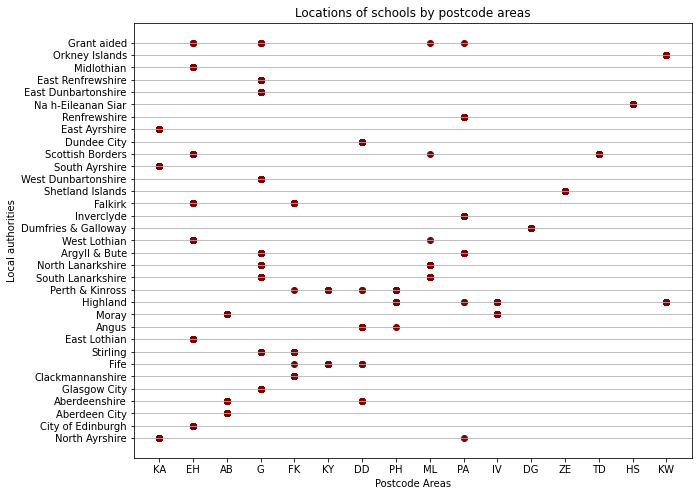

In [431]:
x = schools["pc_area"]
y = schools['Local Authority']

fig = plt.figure(figsize = (10, 8))
plt.scatter(x, y, color ='maroon')

plt.grid(axis='y')
plt.xlabel("Postcode Areas")
plt.ylabel("Local authorities")
plt.title("Locations of schools by postcode areas")
plt.show()

Some local authorities deal with one postcode and that confuses the programming of the bar plot. Below is represented the number of postcodes that each local authority deals with.<br>

This number can also be shown as how many local authorities are present in each postcode area and which ones are those. It is done changing the order of the column names in the pivot table below  and the labels in the bar plot:<br>

<code>
school_pivot_postcode = schools.pivot_table(columns=['pc_area', 'Local Authority'], aggfunc='size')
</code>
<br>

In [363]:
school_pivot_postcode = schools.pivot_table(columns=['Local Authority', 'pc_area'], aggfunc='size')
school_pivot_postcode

Local Authority      pc_area
Aberdeen City        AB          61
Aberdeenshire        AB         166
                     DD           5
Angus                DD          58
                     PH           1
Argyll & Bute        G           13
                     PA          78
City of Edinburgh    EH         123
Clackmannanshire     FK          23
Dumfries & Galloway  DG         114
Dundee City          DD          43
East Ayrshire        KA          54
East Dunbartonshire  G           44
East Lothian         EH          40
East Renfrewshire    G           32
Falkirk              EH           8
                     FK          51
Fife                 DD           4
                     FK           1
                     KY         151
Glasgow City         G          192
Grant aided          EH           3
                     G            4
                     ML           1
                     PA           1
Highland             IV         136
                     KW          25

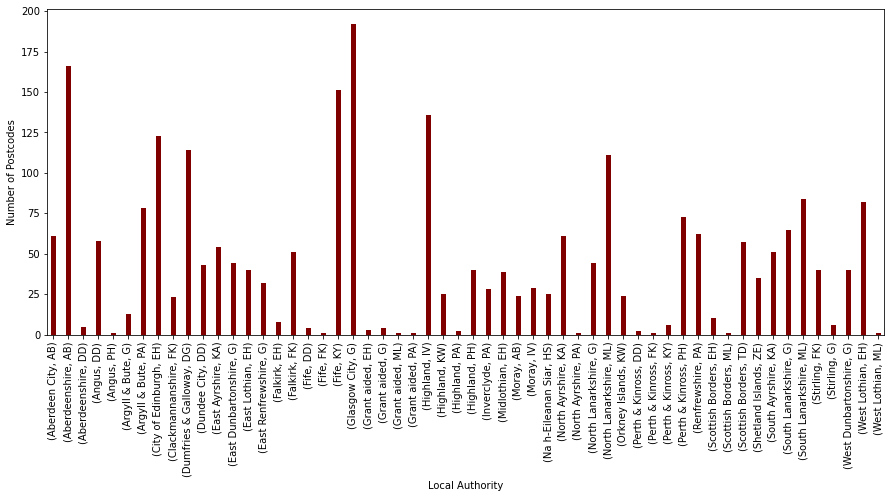

In [432]:
school_pivot_postcode.plot(kind='bar', color ='maroon', width = 0.3, figsize= (15, 6))

plt.xlabel("Local Authority")
plt.ylabel("Number of Postcodes")
plt.show()

Glasgow City local authority deals with the maximum amount of postcodes shown in the bar plot (almost 200), with Aberdeenshire (AB) and Fife (KY) following suit.<br>

Highland has the fourth position, because it deals with a high number of postcodes through a big area of the country. In comparison, Glasgow City is very small and deals with around 50 postcodes more than Highland. These numbers are very important when designing CS actions for schools. As we can see here, and in the maps below, the postcode concentration by local authority is focused in the Central Belt of Scotland and Aberdeen. <br>


#### RELATION BETWEEN POSTCODE AREAS AND PUPIL ROLLS<br> 


The pupil rolls are the number of pupils that attend a given school.<br>

With schools grouped by postcode areas, we have a distribution of the number of pupils attending centres in a given postcode area (not where they live and not specified by local authority).<br>


In [433]:
school_group1 = schools.groupby('pc_area').agg(pupils =('Pupil roll(1)','sum'))
school_group1 

,pupils
pc_area,
AB,63228
DD,34935
DG,18682
EH,112511
FK,37946
G,161541
HS,3328
IV,30952
KA,48474


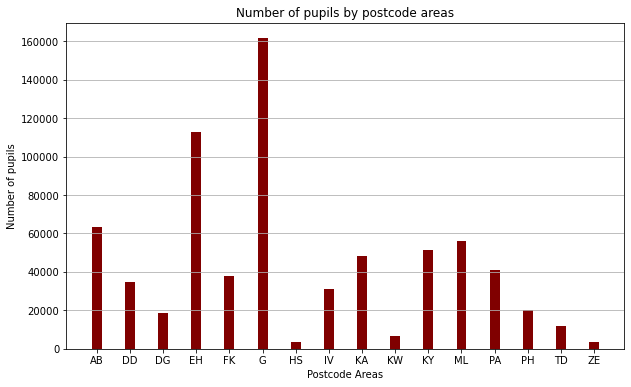

In [434]:
x = school_group1.index
y = school_group1['pupils']

fig = plt.figure(figsize = (10, 6))
plt.bar(x, y, color ='maroon', width = 0.3)

plt.grid(axis='y')
plt.xlabel("Postcode Areas")
plt.ylabel("Number of pupils")
plt.title("Number of pupils by postcode areas")
plt.show()

We can see that the majority of the pupil population is concentrated in 6 main areas of the country. The areas ordered from high to low are:<br>

- Glasgow - GL<br>
- Edinburgh - EH<br>
- Aberdeen - AB<br>
- Motherwell - ML<br>
- Kirkaldy - KY<br>
- Kilmarnock - KA<br>

No surprises here, as those belong to the main cities in the country and the most populated areas, as well. It also follows the graphs above of local authorities and postcode areas.<br>


#### RELATION BETWEEN LOCAL AUTHORITIES AND PUPIL ROLLS<br> 

In order to show the number of pupils distributed by local authorities, we perform a different grouping of data:<br>

In [435]:
school_group2 = schools.groupby('Local Authority').agg(pupils =('Pupil roll(1)','sum'))
school_group2 

,pupils
Local Authority,
Aberdeen City,23695
Aberdeenshire,36317
Angus,15263
Argyll & Bute,10167
City of Edinburgh,51958
Clackmannanshire,6661
Dumfries & Galloway,18682
Dundee City,18347
East Ayrshire,16223


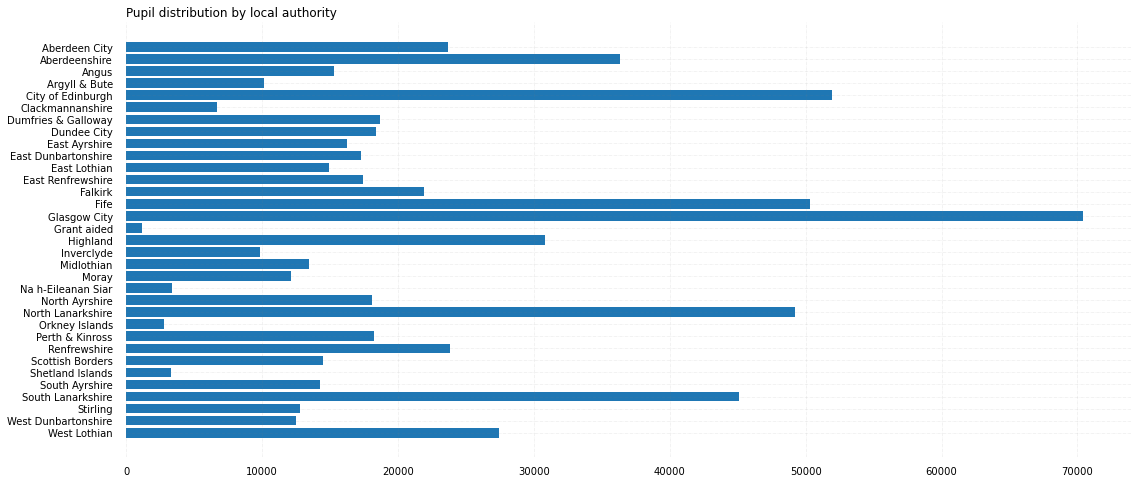

In [436]:
x = school_group2["pupils"]
y = school_group2.index

# Figure Size
fig, ax = plt.subplots(figsize =(18, 8))
 
# Horizontal Bar Plot
ax.barh(y, x)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add Plot Title
ax.set_title('Pupil distribution by local authority', loc ='left')

# Show Plot
plt.show()

The 6 main local authorities, ordered from high to low are:<br>

- Glasgow<br>
- City of Edinburgh<br>
- Fife<br>
- North Lanarkshire<br>
- South Lanarkshire<br>
- Aberdeenshire<br>

Highland Local Authority has around 30,000 pupils, because some of the Perth and Paisley postcodes have been assigned to it. This could mean a high number of schools, spread through almost half of the total extension of the country, with a few pupils each.<br>

North Lanarkshire appears in this list, because some PA and G postcodes have been included in it and this has increased the number of pupils assigned to this local authority. <br> 

Aberdeen area has its postcodes divided between two local authorities: Aberdeen City and Aberdeenshire.<br>

The government has tried to spread the pupils through different local authorities, in order avoid massified school classes in specific geographical areas, and others without almost pupils.<br>


#### RELATION BETWEEN LOCAL AUTHORITIES AND PUPIL GENDER DISTRIBUTION<br> 

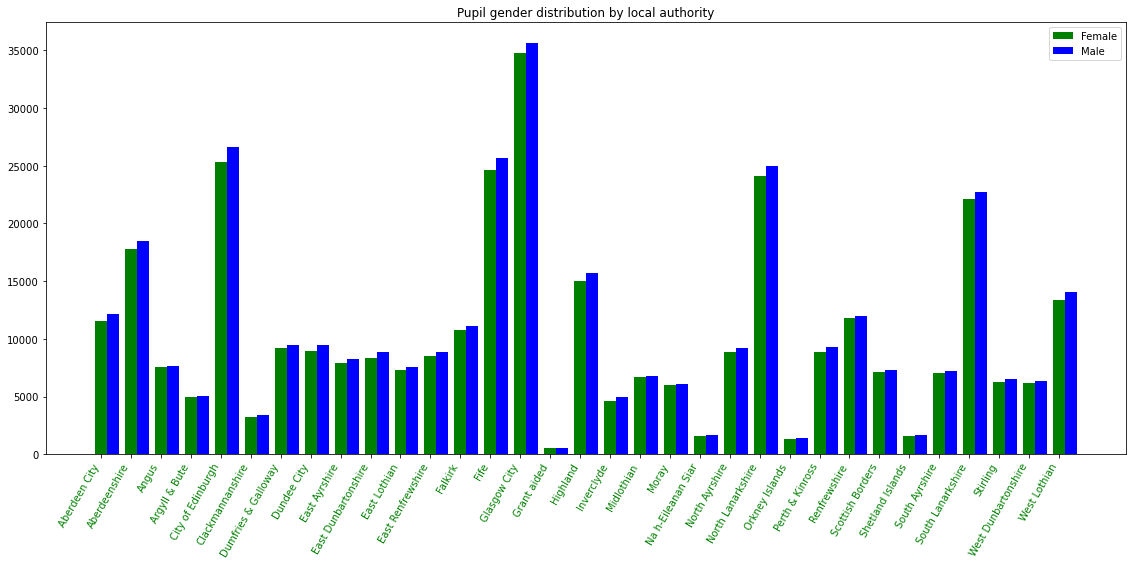

In [437]:
grouped = schools.groupby('Local Authority')[['Female','Male']].sum()

fig, ax = plt.subplots(figsize =(15, 6))
ax = fig.add_axes([0,0,1,1])

index = np.arange(33)
bar_width = 0.4
width = bar_width

r1 = ax.bar(index, grouped['Female'], width = bar_width, color = 'green', label = 'Female')
r2 = ax.bar(index+bar_width, grouped['Male'], width = bar_width, color = 'blue', label = 'Male')

ax.set_xticks(index)

ax.set_xticklabels(grouped.index, color = 'green', rotation=60, horizontalalignment = 'right')

plt.title('Pupil gender distribution by local authority', loc ='center')
plt.legend()
plt.show()

This graph has been included to show the proportion of boys in relation to girls divided by local authority. In the majority, there are more boys than girls. The proportion seems to be closer to 50:50 in the islands in general.<br>


#### RELATION BETWEEN POSTCODE AREAS AND PUPIL GENDER DISTRIBUTION<br> 

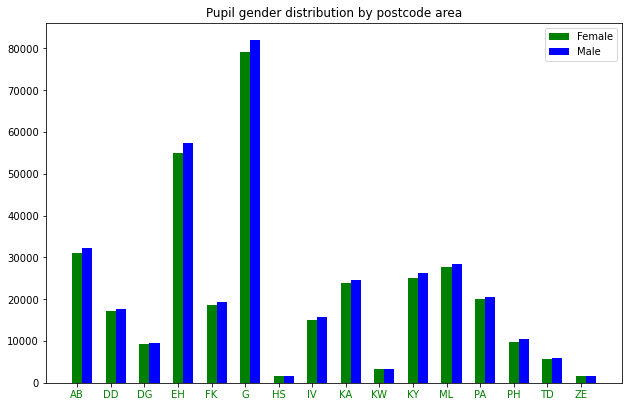

In [438]:
grouped2 = schools.groupby('pc_area')[['Female','Male']].sum()

fig, ax = plt.subplots(figsize =(8, 5))
ax = fig.add_axes([0,0,1,1])

index = np.arange(16)
bar_width = 0.3
width = bar_width

r1 = ax.bar(index, grouped2['Female'], width = bar_width, color = 'green', label = 'Female')
r2 = ax.bar(index + bar_width, grouped2['Male'], width = bar_width, color = 'blue', label = 'Male')

# The labels do not need to be specified, and like the graph above, they are related to the index of grouped data
ax.set_xticks(index)
ax.set_xticklabels(grouped2.index, color = 'green', horizontalalignment = 'center')

plt.title('Pupil gender distribution by postcode area', loc ='center')
plt.legend()
plt.show()

As we can see, the distribution of gender pupil population follows the same graph for the total pupil population, because this graph is only a division by gender of the total population and the postcode distribution from maximum to minimum is the same.<br>


### <span style="color:blue">**PREPARATION OF DATASETS FOR MAPPING SCOTLAND**</span><br>


The maps of Scotland in this study will include the data on pupils, boys/girls, schools, etc using the dataset from the Education Department of the Scottish Government.<br>

The geographical data of the boundaries of the local authorities was downloaded from https://data.spatialhub.scot/dataset/local_authority_boundaries-is.<br>


The names of some of the local authorities differ from the names used by the Spatial Geodata file (with extension shp). The geographical file is more difficult to adapt than the school dataset, hence, some of the names of the local authoritities in the school list will be modified to be the same as the ones in the geographical dataset. Those would be:<br>

<table>
<thead>
<tr>
    <th><strong>Geographical file</strong></th>
    <th><strong>School file</strong></th>
</tr>
</thead>
<tbody>
<tr>
    <td>Eilean Siar</td>
    <td>Na h-Eileanan Siar</td>
</tr>
<tr>
    <td>Perth and Kinross</td>
    <td>Perth & Kinross</td>
</tr>
<tr>
    <td>Argyll and Bute</td>
    <td>Argyll & Bute</td>
</tr>
<tr>
    <td>Dumfries and Galloway</td>
    <td>Dumfries & Galloway</td>
</tr>
</tbody>
</table>
<br>

"Grant Aided" as a local authority will be left in the School file as such, because only contains 9 rows.<br>

In [439]:
schools.loc[schools['Local Authority'] == "Na h-Eileanan Siar", ['Local Authority']] = 'Eilean Siar'
schools.loc[schools['Local Authority'] == "Perth & Kinross", ['Local Authority']] = 'Perth and Kinross'
schools.loc[schools['Local Authority'] == "Argyll & Bute", ['Local Authority']] = 'Argyll and Bute'
schools.loc[schools['Local Authority'] == "Dumfries & Galloway", ['Local Authority']] = 'Dumfries and Galloway'

For the map to work, I will group the schools in the government dataset by local authority and sum up how many schools are there for each local authority.<br>

Due to this, the local authority column becomes the index of the new dataset. Later on, this resulting dataset has to be merged with the geographical data (latitud and longitud of each local authority) by the column of the local authority, so the index column must be empty and have a normal index. For this, I will the function _reset_index_.<br>

Also all the local authorities are shown and it is easy to check if the names were updated accordingly.<br>


In [440]:
grouped = schools.groupby('Local Authority')
localAuth_totals = grouped.agg(np.sum)
localAuth_totals

,SeedCode,FTE Teachers,Pupil roll(1),Pupil Teacher Ratio,Average class size,Female,Male,P1,P2,P3,P4,P5,P6,P7,S1,S2,S3,S4,S5,S6,SIMD Quintile 1,SIMD Quintile 2,SIMD Quintile 3,SIMD Quintile 4,SIMD Quintile 5,SIMD not availble,Comparison Denominations
Local Authority,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aberdeen City,302691116,1677.4,23695,896.2,1119.8,11580,12115,1982,1967,1964,2068,1991,1971,1923,1930,1890,1794,1736,1432,814,2787,5696,2942,3381,7952,0,61
Aberdeenshire,886014501,2683.4,36317,2224.7,2886.9,17781,18461,2869,2798,2827,2937,2969,2904,3080,2924,2840,2867,2722,2326,1453,933,2761,6212,12079,10992,0,171
Angus,313164641,1171.9,15263,760.2,1027.0,7576,7687,1144,1151,1237,1242,1183,1180,1219,1323,1272,1186,1215,986,731,1058,3248,4051,4037,1951,0,59
Argyll and Bute,733287630,839.1,10167,940.1,1202.0,4949,5081,657,656,702,724,717,803,787,833,806,804,772,750,523,851,1583,3535,2506,582,0,91
City of Edinburgh,670886274,3403.3,51958,1938.1,2182.1,25280,26642,4167,4496,4465,4485,4345,4242,4230,4125,4018,3746,3549,3047,2384,9589,7685,6015,8133,19589,0,123
Clackmannanshire,126457815,545.7,6661,283.4,395.9,3228,3433,548,526,519,611,550,584,579,518,537,465,451,412,233,2111,1675,1030,696,943,0,23
Dumfries and Galloway,661065281,1319.8,18682,1543.2,1919.7,9218,9440,1241,1285,1289,1447,1370,1516,1525,1522,1621,1628,1548,1322,856,1608,4572,6126,2637,1796,12,114
Dundee City,216067082,1308.4,18347,631.2,817.2,8920,9427,1345,1427,1408,1521,1555,1546,1528,1561,1518,1467,1402,1049,717,7645,3336,1298,2422,2758,0,43
East Ayrshire,415604215,1214.8,16223,699.1,886.5,7903,8279,1245,1281,1263,1309,1323,1307,1285,1322,1238,1262,1215,1083,663,5128,3724,2477,2124,1569,0,54


I will maintain both formulas for the reset of the index, because for some strange reason, sometimes works with one and sometimes with the other. <br>


In [441]:
localAuth_totals.reset_index(level = ['Local Authority'], inplace=True)

#localAuth_totals.reset_index(drop=True)
localAuth_totals

,Local Authority,SeedCode,FTE Teachers,Pupil roll(1),Pupil Teacher Ratio,Average class size,Female,Male,P1,P2,P3,P4,P5,P6,P7,S1,S2,S3,S4,S5,S6,SIMD Quintile 1,SIMD Quintile 2,SIMD Quintile 3,SIMD Quintile 4,SIMD Quintile 5,SIMD not availble,Comparison Denominations
0,Aberdeen City,302691116,1677.4,23695,896.2,1119.8,11580,12115,1982,1967,1964,2068,1991,1971,1923,1930,1890,1794,1736,1432,814,2787,5696,2942,3381,7952,0,61
1,Aberdeenshire,886014501,2683.4,36317,2224.7,2886.9,17781,18461,2869,2798,2827,2937,2969,2904,3080,2924,2840,2867,2722,2326,1453,933,2761,6212,12079,10992,0,171
2,Angus,313164641,1171.9,15263,760.2,1027.0,7576,7687,1144,1151,1237,1242,1183,1180,1219,1323,1272,1186,1215,986,731,1058,3248,4051,4037,1951,0,59
3,Argyll and Bute,733287630,839.1,10167,940.1,1202.0,4949,5081,657,656,702,724,717,803,787,833,806,804,772,750,523,851,1583,3535,2506,582,0,91
4,City of Edinburgh,670886274,3403.3,51958,1938.1,2182.1,25280,26642,4167,4496,4465,4485,4345,4242,4230,4125,4018,3746,3549,3047,2384,9589,7685,6015,8133,19589,0,123
5,Clackmannanshire,126457815,545.7,6661,283.4,395.9,3228,3433,548,526,519,611,550,584,579,518,537,465,451,412,233,2111,1675,1030,696,943,0,23
6,Dumfries and Galloway,661065281,1319.8,18682,1543.2,1919.7,9218,9440,1241,1285,1289,1447,1370,1516,1525,1522,1621,1628,1548,1322,856,1608,4572,6126,2637,1796,12,114
7,Dundee City,216067082,1308.4,18347,631.2,817.2,8920,9427,1345,1427,1408,1521,1555,1546,1528,1561,1518,1467,1402,1049,717,7645,3336,1298,2422,2758,0,43
8,East Ayrshire,415604215,1214.8,16223,699.1,886.5,7903,8279,1245,1281,1263,1309,1323,1307,1285,1322,1238,1262,1215,1083,663,5128,3724,2477,2124,1569,0,54
9,East Dunbartonshire,337468808,1326.7,17304,594.2,757.3,8377,8864,1232,1271,1292,1306,1275,1387,1354,1387,1420,1400,1396,1277,1060,1241,2860,982,3314,8354,0,44


Now we read the file of the geographical data with a set filepath and show the data below in a small plot, just to check that it works properly:<br>
    

In [442]:
fp = ('https://github.com/EsterGM/Women-In-Tech/tree/main/Local_Authority_Boundaries_-_Scotland/pub_las.shp')
# Ths shp file is inside the zip file of the boundaries
map_df = gpd.read_file(fp)

# Check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,local_auth,code,hectares,geometry
0,Clackmannanshire,S12000005,16391.26,"POLYGON ((298892.300 694533.901, 298883.502 69..."
1,Dundee City,S12000042,6222.38,"POLYGON ((335355.398 732766.897, 335359.199 73..."
2,East Dunbartonshire,S12000045,17448.90,"POLYGON ((258240.100 677037.100, 258182.500 67..."
3,East Renfrewshire,S12000011,17424.95,"POLYGON ((250331.100 650306.001, 250324.001 65..."
4,Falkirk,S12000014,31493.35,"POLYGON ((278764.300 678216.902, 278755.997 67..."


<AxesSubplot:>

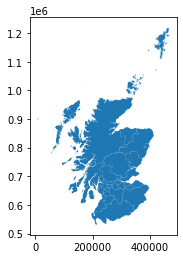

In [443]:
map_df.plot()

### <span style="color:blue">**MAPPING SCOTLAND**</span><br>

My dataset is prepared for being mapped already, but as optional steps, I decided to follow the CityFiber Jupiter Notebook in GitHub:<br>
    

In [444]:
# Extract a slice of the data that we will be using
local = localAuth_totals[['Local Authority','FTE Teachers','Pupil roll(1)','Female','Male']]

In [445]:
local.dtypes

Local Authority     object
FTE Teachers       float64
Pupil roll(1)        int64
Female               int64
Male                 int64
dtype: object

In [446]:
# Rename the columns
data_for_map = local.rename(index=str, columns={'Local Authority' : 'local_auth', 'FTE Teachers' : 'FTE','Pupil roll(1)': 'Pupil'})
# Check the new dataframe
data_for_map.tail(10)

,local_auth,FTE,Pupil,Female,Male
23,Orkney Islands,240.4,2804,1342,1439
24,Perth and Kinross,1330.1,18197,8849,9325
25,Renfrewshire,1757.4,23845,11830,12015
26,Scottish Borders,1021.6,14478,7150,7284
27,Shetland Islands,316.4,3289,1596,1683
28,South Ayrshire,1065.1,14267,7080,7187
29,South Lanarkshire,3438.1,45091,22151,22761
30,Stirling,923.8,12747,6251,6496
31,West Dunbartonshire,950.8,12522,6163,6317
32,West Lothian,1965.7,27449,13397,14052


"Tail" is chosen instead of "head" because the merge function was giving me issues with the data of Perth and Kinross (NaN in all numbers instead of the numbers themselves). <br>

After investigating this error in several blogs and websites, there are different solutions and unfortunately none worked correctly, until I realised that the formula for the _reset_index_ affected the merged function. When the kernel is revamped, one of the reset formulas does not work and it needs to be changed for the other. I find this solution the best so far, until I find the reasons why this is happening.<br> 


Now we can merge the dataset slice (taken from the complete dataset of schools) and the geographic dataset. As both have a column with the same data (local authorities), it will be this one used for the "join". <br> 


In [447]:
merged3 = map_df.set_index('local_auth').join(data_for_map.set_index('local_auth'))
merged3.tail(11)

,code,hectares,geometry,FTE,Pupil,Female,Male
local_auth,,,,,,,
Highland,S12000017,2647292.36,"MULTIPOLYGON (((320228.803 976907.503, 320230....",2233.8,30826,15011,15679
Perth and Kinross,S12000048,541894.44,"POLYGON ((234916.496 736245.501, 234910.997 73...",1330.1,18197,8849,9325
East Ayrshire,S12000008,127034.20,"POLYGON ((243071.200 655079.705, 243096.298 65...",1214.8,16223,7903,8279
Inverclyde,S12000018,17362.52,"POLYGON ((229432.797 677496.398, 229761.799 67...",749.3,9811,4625,4993
Renfrewshire,S12000038,26923.96,"POLYGON ((238994.899 673956.002, 239110.503 67...",1757.4,23845,11830,12015
Glasgow City,S12000049,17635.60,"POLYGON ((258096.702 672970.504, 258136.798 67...",5304.2,70406,34728,35633
North Lanarkshire,S12000050,47230.91,"POLYGON ((272346.600 683872.603, 272407.201 68...",3679.8,49232,24121,25012
Dumfries and Galloway,S12000006,667631.48,"MULTIPOLYGON (((300761.496 557416.301, 300762....",1319.8,18682,9218,9440
South Ayrshire,S12000028,123468.52,"MULTIPOLYGON (((238321.896 637231.404, 238331....",1065.1,14267,7080,7187


After the merge, just a last check, to be sure that all rows and data has been catched appropriately:<br> 
    

In [448]:
pd.isna(merged3).sum()

code        0
hectares    0
geometry    0
FTE         0
Pupil       0
Female      0
Male        0
dtype: int64

It looks like there are no empty cells and all are numbers and not NaN.<br>


#### MAP SHOWING PUPIL POPULATION IN RELATION TO LOCAL AUTHORITIES<br> 

We can proceed with the first map. It will shown the demographic distribution of pupils (together boys and girls) in Scotland.<br>


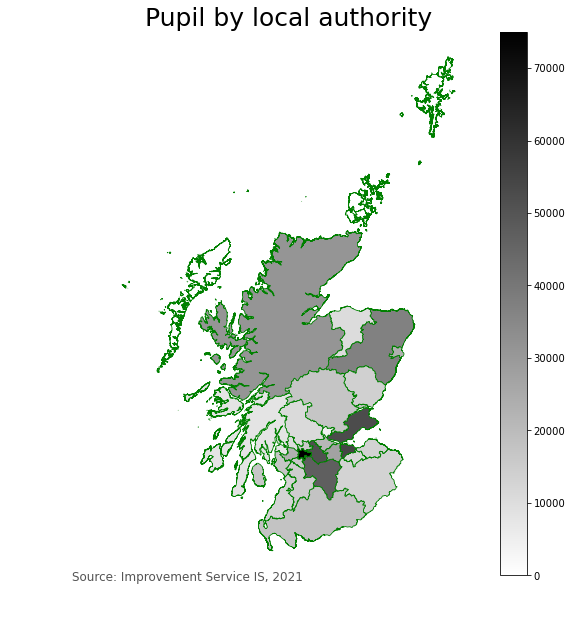

In [449]:
# set a variable that will call whatever column we want to visualise on the map, between FTE, Pupil, Female and Male
variable = 'Pupil'
# set the range for the choropleth
vmin, vmax = 0, 75000

fig, ax = plt.subplots(1, figsize=(10, 10))

# create map with grey-black colors in the colormap (cmap) 
merged3.plot(column=variable, cmap='gist_yarg', linewidth=0.8, ax = ax, edgecolor="green")

# remove axis
ax.axis('off')
# add a title
ax.set_title('Pupil by local authority', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: Improvement Service IS, 2021',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

# Create colorbar as a legend
sm = mpl.cm.ScalarMappable(cmap='gist_yarg', norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

The highest number of pupils are located in Glasgow, as it was shown in the bar plots above and also in the Central Belt up to Edinburgh. <br>

Highland shows in the range of 30,000 pupils, but we need to remember that it covers between 1/3 and half of the country.<br>


#### MAP SHOWING PUPIL GENDER DISTRIBUTION IN RELATION TO LOCAL AUTHORITIES<br> 


The maps below show the same as the map above, however the pupil population is divided by gender. As there are no noticeable gender differences between councils, the maps below provide the same information with a different palette of colors to highlight the different areas even more than above and to show the capacities of maps.<br>


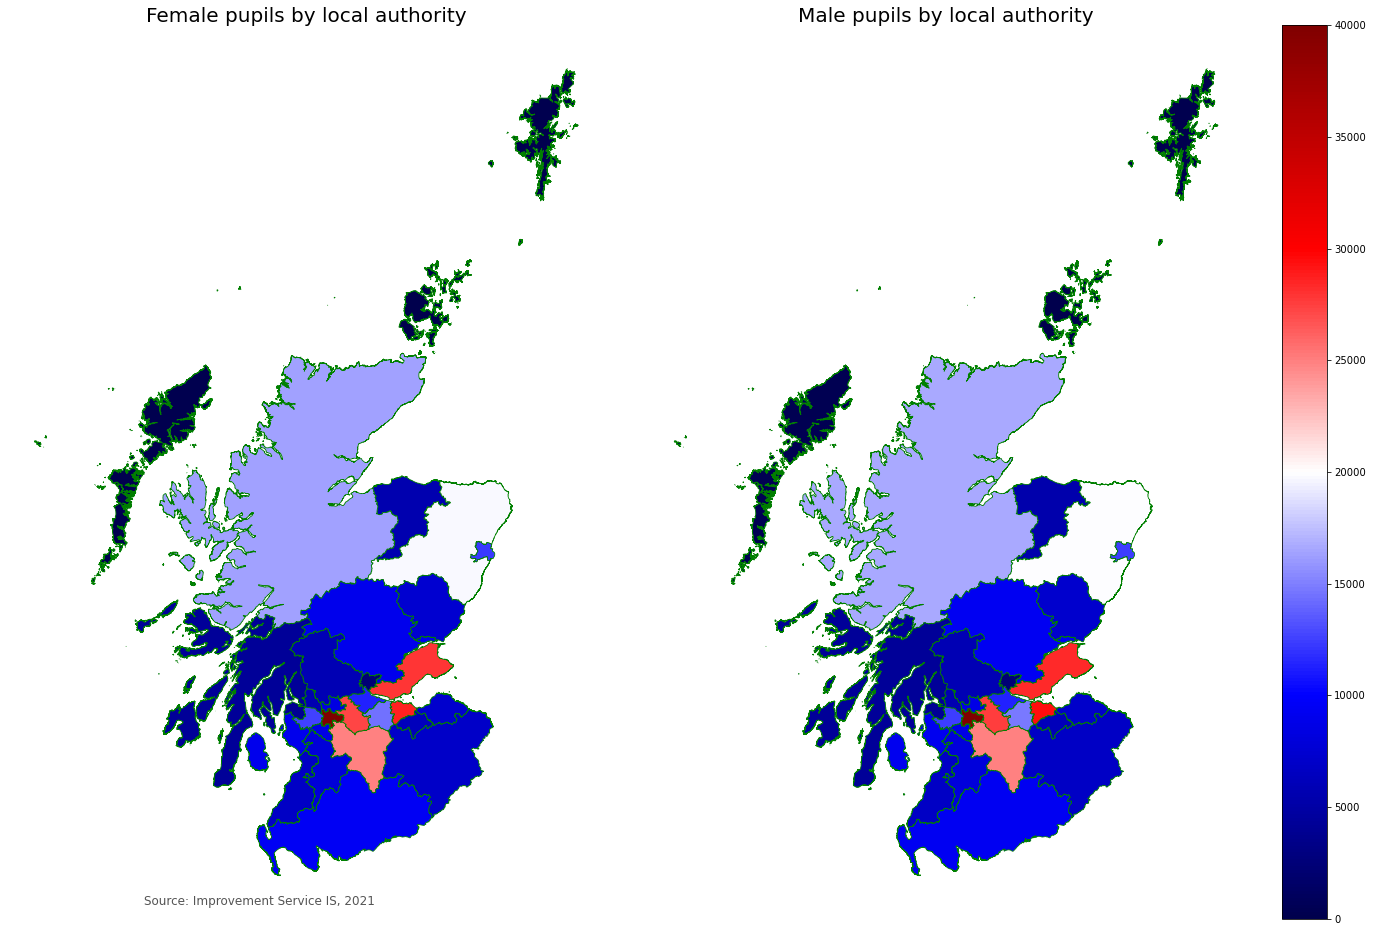

In [515]:
# set a variable that will call whatever column we want to visualise on the map. 
variable = 'Female'
variable1 = 'Male'
# set the range for the choropleth
vmin, vmax = 0, 40000

# create 2 figures in 1 row and 2 columns, with total figure size and grindspec 8 - 10
# grindspec must have the first column smaller than the right one, because by default, the right one is smaller and both
# should have the same size
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 13), gridspec_kw={'width_ratios': [8, 10]})
fig.tight_layout()

# create maps
ax1 = merged3.plot(column=variable, cmap='seismic', linewidth=0.8, ax = ax1, edgecolor="green")
ax2 = merged3.plot(column=variable1, cmap='seismic', linewidth=0.8, ax = ax2, edgecolor="green")

# add a title
ax1.set_title('Female pupils by local authority', fontdict={'fontsize': '20', 'fontweight' : '3'})
ax2.set_title('Male pupils by local authority', fontdict={'fontsize': '20', 'fontweight' : '3'})
# create an annotation for the data source
ax1.annotate('Source: Improvement Service IS, 2021',xy=(0.1, 0.04), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
#ax2.annotate('Source: Improvement Service IS, 2021',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

ax1.axis('off')
ax2.axis('off')

# Create colorbar as a legend
sm = mpl.cm.ScalarMappable(cmap='seismic', norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
#cbar = fig.colorbar(sm)
cbar = fig.colorbar(sm, orientation='vertical')

## <font color = blue>CONCLUSIONS</font><br>

Given the results of the graphs, I believe that:<br>
    
- As per the education law, pupils are asked to go to schools in their residence areas. If the families have enough means, children are sent to private schools, that can be located outside the residence area. <br>

- Local Authorities are the education councils. They have splitted the postcode areas of the country in a way that some massified areas become less pupils per class. For example:<br>

    - Pupils from Glasgow go to schools of local authorities in: Glasgow, Paisley, North/South Lanarkshire and Kilmarnock.<br>
    - Pupils from Edinburgh go to schools in: Midlothian, Falkirk and Kilkenny (Fife).<br>
    
- This explains why there is a high population of pupils in certain postcode areas (cities like Glasgow, Edinburgh, Aberdeen) that matches with more than one local authority, as the pupils attend schools in councils around the cities. Also, the schools are easier to manage if there are not concentrated in a few local authorities but divided between several of them.<br>

- In general, there are more boys than girls attending school. The difference is not big, however it provides more boys for CS. In this way, if CS subjects have been on the increase in the last years, it could be because there are more boys in the general population, and not that more girls are motivated to take CS subjects.<br>

    - This difference seems not to exist in the islands (Lewis, Orkney, Shetlands, etc).<br>

If we want other comparisons, we need to know which schools offer CS subjects. At this moment, demographic information is the only output available.<br>

The maps and the instructions provided in this Jupyter notebook can be used when the data is received.<br>
